# EXEMPLOS QUE MODELOS DE MACHINE LEARNING PERCEPTRON SIMPLES E DE MULTIPLAS CAMADAS

## EXEMPLO 01

In [ ]:
 # IMPORTAR AS BIBLIOTECAS
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [ ]:
# CARREGAR A BASE DE DADOS
x, y = load_digits(return_X_y=True)

In [ ]:
# MOSTRAR O TOTAL DE LINHAS DO DATASETS
print(len(x))

1797


In [ ]:
x [0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# CRIAR A REDE NEURAL, TREINAR E MOSTAR SUA PONTUAÇÃO DE ACERTO
pct = Perceptron ()
pct.fit(x, y)
pct.score(x, y)

0.9393433500278241

# TRATAMENTO DA BASE DE DADOS

## EXEMPLO 02

In [ ]:
# BIBLIOTECAS NECESSÁRIAS
import numpy as np
import pandas as pd

# BIBLIOTECAS DE MACHINE LEARNING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# BIBLIOTECAS PARA MÉTRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# CARRECGAR AS DUAS BASES DE DADOS USADAS PARA ESTE ESTUDO
train_data = pd.read_csv('/content/drive/MyDrive/titanic_train.csv', delimiter=';')
test_data = pd.read_csv('/content/drive/MyDrive/titanic_test.csv', delimiter=';')

In [ ]:
# MOASTRAR A BASE DE DADOS TREINO
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
# MOTRAR A BASE DE DADOS TESTE
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,78292.0,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,96875.0,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,86625.0,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,122875.0,NaN,S


In [ ]:
# EXCLUIR TODOS OS VALORES AUSENTES E NULOS DO DATAFRAME
dropper_test = test_data.dropna()

In [ ]:
train_data.drop (['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)
test_data.drop (['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [ ]:
LE = LabelEncoder()
train_data['Sex'] = LE.fit_transform(train_data['Sex'])
test_data['Sex'] = LE.fit_transform(test_data['Sex'])

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(train_data[['Embarked']]).toarray())
train_data = train_data.iloc[: , :-1]
pd.concat([train_data, one_hot_encond_temp], axis=1, ignore_index=False)

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(test_data[['Embarked']]).toarray())
test_data = test_data.iloc[: , :-1]
pd.concat([test_data, one_hot_encond_temp], axis=1, ignore_index=False)

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,3,1,34.5,0,0,78292.00,0.0,1.0,0.0
1,3,0,47.0,1,0,7.00,0.0,0.0,1.0
2,2,1,62.0,0,0,96875.00,0.0,1.0,0.0
3,3,1,27.0,0,0,86625.00,0.0,0.0,1.0
4,3,0,22.0,1,1,122875.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.05,0.0,0.0,1.0
414,1,0,39.0,0,0,108.90,1.0,0.0,0.0
415,3,1,38.5,0,0,7.25,0.0,0.0,1.0
416,3,1,NaN,0,0,8.05,0.0,0.0,1.0


In [ ]:
train_data.dropna (inplace=True)
test_data.dropna (inplace=True)

In [ ]:
xTrain = train_data.iloc [ : , 1 :]
yTrain = train_data.iloc [ : , 0]
xTest = test_data
xTrain

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.25
1,1,0,38.0,1,0,712833.00
2,3,0,26.0,0,0,7925.00
3,1,0,35.0,1,0,53.10
4,3,1,35.0,0,0,8.05
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29125.00
886,2,1,27.0,0,0,13.00
887,1,0,19.0,0,0,30.00
889,1,1,26.0,0,0,30.00


In [ ]:
sc = StandardScaler()
sc.fit(xTrain)

xTrain = sc.transform(xTrain.values)
xTest = sc.transform(xTest.values)

xTrain

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.91123237,  0.75905134, -0.53037664,  0.52457013, -0.50589515,
        -0.30760817],
       [-1.47636364, -1.31743394,  0.57183099,  0.52457013, -0.50589515,
         1.30469542],
       [ 0.91123237, -1.31743394, -0.25482473, -0.55170307, -0.50589515,
        -0.28969942],
       ...,
       [-1.47636364, -1.31743394, -0.73704057, -0.55170307, -0.50589515,
        -0.30755671],
       [-1.47636364,  0.75905134, -0.25482473, -0.55170307, -0.50589515,
        -0.30755671],
       [ 0.91123237,  0.75905134,  0.15850313, -0.55170307, -0.50589515,
        -0.30760704]])

# REDE NEURAL

In [ ]:
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(xTrain, yTrain)

Perceptron(eta0=0.1, max_iter=100)

In [ ]:
ypred= ppn.predict(xTest)

In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/test_y.csv',delimiter=';')
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
y_test.drop(dropper_test ['PassengerId'].index, inplace=True)
y_test = y_test ['Survived'].values

In [ ]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [ ]:
confusion_matrix(y_test, ypred)

array([[154,  69],
       [ 60,  48]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


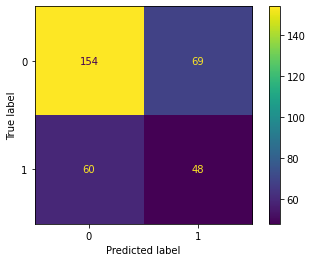

In [ ]:
plot_confusion_matrix(ppn,xTest,y_test)

In [ ]:
accuracy_score(y_test, ypred)

0.6102719033232629

# TRATAMENTO DE BASE DE DADOS

## EXEMPLO 03

In [ ]:
# BIBLIOTECAS NECESSÁRIAS
import numpy as np
import pandas as pd

# BIBLIOTECAS DE MACHINE LEARNING
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# BIBLIOTECAS PARA MÉTRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv', sep=';')
original_data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data = original_data.iloc [:, 1 :]

x = data.iloc [:, :-1]
y = data.iloc [:, -1:]
print(len(x))

767


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train.values)
x_test_scaled = sc.transform(x_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# PERCEPTRON

In [ ]:
ppn = Perceptron(max_iter=1000,eta0=0.15)
ppn.fit(x_train, y_train.values.ravel())

Perceptron(eta0=0.15)

In [ ]:
y_pred = ppn.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[26, 47],
       [16, 27]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


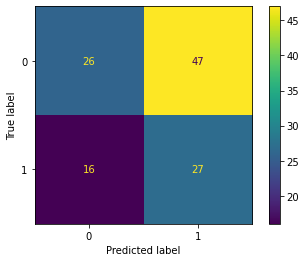

In [ ]:
plot_confusion_matrix(ppn, x_test, y_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.45689655172413796

# PERCEPTRON DE MULTICAMACAS

## EXEMPLO 04

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random as python_random

In [ ]:
SEED = 0

In [ ]:
np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size=16, epochs=2000)

Epoch 1/2000
41/41 [==============================] - 1s 3ms/step - loss: 11.9011 - accuracy: 0.3487
Epoch 2/2000
41/41 [==============================] - 0s 3ms/step - loss: 3.1488 - accuracy: 0.4731
Epoch 3/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.5784 - accuracy: 0.6144
Epoch 4/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.4323 - accuracy: 0.6237
Epoch 5/2000
41/41 [==============================] - 0s 6ms/step - loss: 1.3485 - accuracy: 0.6237
Epoch 6/2000
41/41 [==============================] - 0s 8ms/step - loss: 1.2691 - accuracy: 0.6329
Epoch 7/2000
41/41 [==============================] - 0s 9ms/step - loss: 1.1900 - accuracy: 0.6329
Epoch 8/2000
41/41 [==============================] - 0s 4ms/step - loss: 1.1342 - accuracy: 0.6329
Epoch 9/2000
41/41 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.6406
Epoch 10/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.0247 - accuracy: 0.639

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

0.7241379310344828

In [ ]:
confusion_matrix(y_test, y_pred)

array([[62, 11],
       [21, 22]])

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/cardio.csv',delimiter=';')
original_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data = original_data.iloc [:, 1:]

x = data.iloc[:, :-1]
y = data.iloc[:, -1:]

print(len(x))

70000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [ ]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [ ]:
x_train_scaled = sc.transform(x_train.values)
x_test_scaled = sc.transform(x_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# PERCEPTRON

In [ ]:
ppn = Perceptron(max_iter=1000,eta0=0.1, random_state=0)
ppn.fit(x_train, y_train.values.ravel())

Perceptron(eta0=0.1)

In [ ]:
y_pred = ppn.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2789, 2497],
       [1001, 4213]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


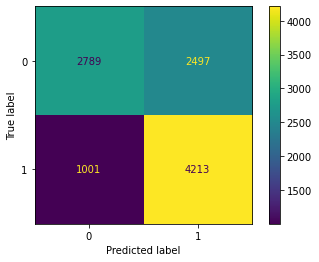

In [ ]:
plot_confusion_matrix(ppn,x_test,y_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6668571428571428

## PERCEPTRON DE MULTICAMADAS

## EXEMPLO 05

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random as python_random

In [ ]:
SEED=0

In [ ]:
np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = ann.fit(x_train, y_train, batch_size=120, epochs=100)

Epoch 1/100
496/496 [==============================] - 1s 2ms/step - loss: 42.6664 - accuracy: 0.4985
Epoch 2/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7424 - accuracy: 0.5047
Epoch 3/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7590 - accuracy: 0.5058
Epoch 4/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7515 - accuracy: 0.5053
Epoch 5/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7490 - accuracy: 0.5089
Epoch 6/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7531 - accuracy: 0.5065
Epoch 7/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7432 - accuracy: 0.5086
Epoch 8/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7407 - accuracy: 0.5101
Epoch 9/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7298 - accuracy: 0.5130
Epoch 10/100
496/496 [==============================] - 1s 2ms/step - loss: 0.7318 - accur

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

accuracy_score(y_test, y_pred)

0.7103809523809523

In [ ]:
confusion_matrix(y_test, y_pred)

array([[3811, 1475],
       [1566, 3648]])